# Convert Excel into csv

In [2]:
import pandas as pd
df = pd.read_excel('products.xlsx', sheet_name='Sheet1')
df.to_csv('products.csv', index=False)

# Cleaning the csv file

In [3]:

# Step 1: Load the CSV
df = pd.read_csv('products.csv')

# Step 2: Remove unwanted characters from Price and convert to float

df['Price'] = df['Price'].str.replace('Â', '', regex=False)
df['Price'] = df['Price'].str.replace('£', '', regex=False).astype(float)

# Step 3: Remove leading/trailing spaces from Product Name


df['Product Name'] = df['Product Name'].str.strip()

# Step 4 (Optional): Remove common articles (A, An, The) from Product Name
articles = ['A ', 'An ', 'The ']
for article in articles:
    df['Product Name'] = df['Product Name'].str.replace(f'^{article}', '', regex=True)

# Step 5: Save cleaned CSV

df.to_csv('product_cleaned.csv', index=False)

print("Cleaning complete! Saved as 'product_cleaned.csv'")


Cleaning complete! Saved as 'product_cleaned.csv'


# Generate Data Summary

In [4]:

# Load cleaned CSV
df = pd.read_csv('product_cleaned.csv')

# 1 Basic statistics about Price
summary_stats = df['Price'].describe()
print("Price Summary:\n", summary_stats)

# 2 Most expensive and cheapest books
most_expensive = df.loc[df['Price'].idxmax()]
cheapest = df.loc[df['Price'].idxmin()]

print("\nMost Expensive Book:\n", most_expensive)
print("\nCheapest Book:\n", cheapest)

# 3 Count of books
total_books = len(df)
print("\nTotal number of books:", total_books)

# 4 Average price
avg_price = df['Price'].mean()
print("Average price:", round(avg_price, 2))

# 5 Optional: Group by first letter of the book (for reporting)
df['First Letter'] = df['Product Name'].str[0].str.upper()
letter_counts = df.groupby('First Letter')['Product Name'].count()
print("\nBooks count by first letter:\n", letter_counts)


Price Summary:
 count    40.000000
mean     34.958750
std      14.111908
min      12.840000
25%      22.575000
50%      34.080000
75%      50.407500
max      57.250000
Name: Price, dtype: float64

Most Expensive Book:
 Product Name    Our Band Could Be Your Life: Scenes from the A...
Price                                                       57.25
Name: 15, dtype: object

Cheapest Book:
 Product Name    In Her Wake
Price                 12.84
Name: 20, dtype: object

Total number of books: 40
Average price: 34.96

Books count by first letter:
 First Letter
A    2
B    6
C    2
D    1
E    1
F    3
H    1
I    3
L    2
M    2
O    2
P    1
R    2
S    8
T    1
W    2
Y    1
Name: Product Name, dtype: int64


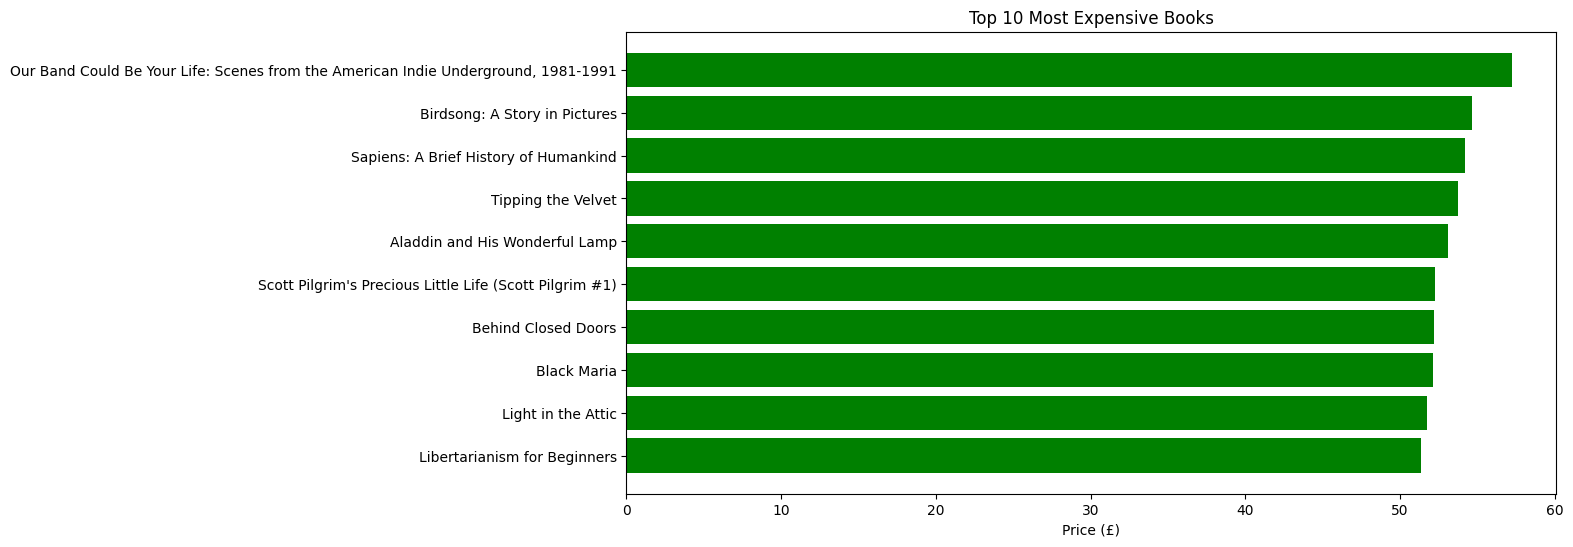

Bar chart saved as 'top_10_expensive_books.png'


In [12]:
import matplotlib.pyplot as plt

top_books = df.sort_values('Price', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_books['Product Name'], top_books['Price'], color='green')
plt.xlabel('Price (£)')
plt.title('Top 10 Most Expensive Books')
plt.gca().invert_yaxis()

save_path = 'top_10_expensive_books.png'
plt.savefig(save_path)
plt.show()              
print(f"Bar chart saved as '{save_path}'")


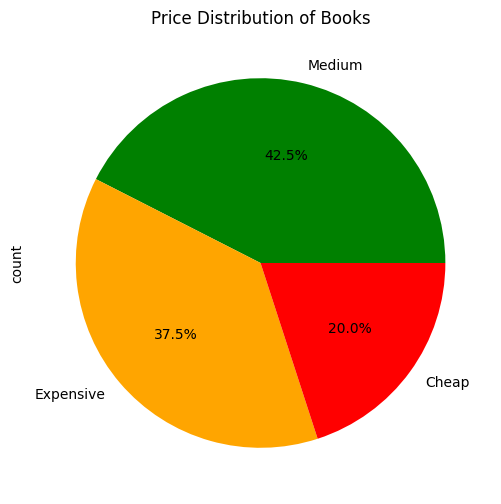

Pie chart saved as 'price_distribution_pie_chart.png'


In [11]:
ax = df['Category'].value_counts().plot.pie(
    autopct='%1.1f%%', figsize=(6,6), colors=['green','orange','red']
)
plt.title('Price Distribution of Books')

fig = ax.get_figure()  # get the figure from the axes
save_path = 'price_distribution_pie_chart.png'
fig.savefig(save_path)  # save directly from the figure
plt.show()
print(f"Pie chart saved as '{save_path}'")
